In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.datasets import fetch_openml
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report, ConfusionMatrixDisplay
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree

## Importing data

In [34]:
mnist = fetch_openml('mnist_784', as_frame=False) # loading 70000 28x28 images (784 features each)

X, y = mnist.data, mnist.target

print(X)
print(X.shape)

print(y)
print(y.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(70000, 784)
['5' '0' '4' ... '4' '5' '6']
(70000,)


## Separating Data

- Train: 70%
- Validation: 10%
- Test: 20%

In [37]:
# MNIST is already split and into train and test, and is already shuffled!
X_train, X_val, X_test, y_train, y_val, y_test = X[:49000], X[49000:56000], X[56000:], y[:49000], y[49000:56000], y[56000:]

## Support Vector Machine

### Training original dataset

In [39]:
# Best params: 
# {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
def train_predictSVM(X_train, y_train):
    svm_mnist = svm.SVC(C=10, gamma='scale', kernel='rbf')
    svm_mnist.fit(X_train, y_train)
    svm_predict = svm_mnist.predict(X_test)
    acc = accuracy_score(y_test, svm_predict)
    return acc

In [40]:
num_samples = [100, 500, 1000, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 49000]

accs = []

for i in range(len(num_samples)):
    print(f'\nTraining with {num_samples[i]} samples...')
    accs.append(train_predictSVM(X_train[:num_samples[i]], y_train[:num_samples[i]]))
    print(f' Accuracy is {accs[i]}')


Training with 100 samples...


 Accuracy is 0.7058571428571428

Training with 500 samples...
 Accuracy is 0.8858571428571429

Training with 1000 samples...
 Accuracy is 0.923

Training with 5000 samples...
 Accuracy is 0.9595714285714285

Training with 10000 samples...
 Accuracy is 0.9704285714285714

Training with 15000 samples...
 Accuracy is 0.9747142857142858

Training with 20000 samples...
 Accuracy is 0.9778571428571429

Training with 25000 samples...
 Accuracy is 0.9797142857142858

Training with 30000 samples...
 Accuracy is 0.9807142857142858

Training with 350000 samples...
 Accuracy is 0.9841428571428571

Training with 40000 samples...
 Accuracy is 0.9818571428571429

Training with 49000 samples...
 Accuracy is 0.9841428571428571


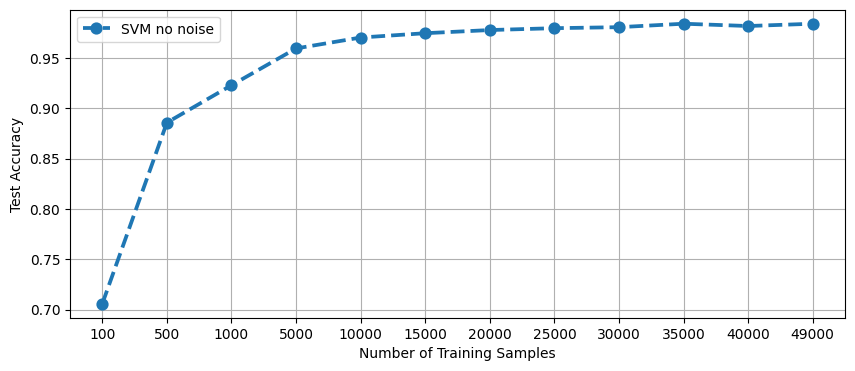

In [75]:
plt.figure(figsize=(10, 4))
sn.pointplot(x=num_samples, y=accs, linestyles='--')
plt.grid(True)
plt.xlabel('Number of Training Samples')
plt.ylabel('Test Accuracy')
plt.legend(['SVM no noise'])

In [187]:
svm_mnist = svm.SVC(C=10, gamma='scale', kernel='rbf')
svm_mnist.fit(X_train, y_train)

SVC(C=10)

['0']


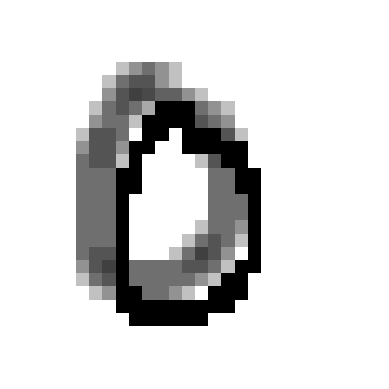

In [188]:
import cv2 as cv
im = cv.imread('./numbers/0.png', cv.IMREAD_GRAYSCALE)
im = im.flatten()

svm_predict = svm_mnist.predict([im])
print(svm_predict)

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

plot_digit(im)